In [92]:
import pandas as pd
import numpy as np
import math

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, median_absolute_error

import matplotlib.pyplot as plt 

import tensorflow as tf

print(sys.version)
print(tf.__version__)

3.8.3 (tags/v3.8.3:6f8c832, May 13 2020, 22:37:02) [MSC v.1924 64 bit (AMD64)]
2.7.0


In [62]:
df = pd.read_csv("D:/vscode/03_stsTensileTest/data/steel_strength.csv")
print(df.shape)
df.head()


(312, 17)


,formula,c,mn,si,cr,ni,mo,v,n,nb,co,w,al,ti,yield strength,tensile strength,elongation
0,Fe0.620C0.000953Mn0.000521Si0.00102Cr0.000110N...,0.02,0.05,0.05,0.01,19.70,2.95,0.01,0.00,0.01,15.00,0.00,0.15,1.55,2411.5,2473.5,7.0
1,Fe0.623C0.00854Mn0.000104Si0.000203Cr0.147Ni0....,0.18,0.01,0.01,13.44,0.01,3.01,0.46,0.04,0.01,19.46,2.35,0.04,0.00,1123.1,1929.2,8.0
2,Fe0.625Mn0.000102Si0.000200Cr0.0936Ni0.129Mo0....,0.00,0.01,0.01,8.67,13.45,0.82,0.01,0.00,0.01,13.90,0.00,0.39,0.57,1736.3,1871.8,NaN
3,Fe0.634C0.000478Mn0.000523Si0.00102Cr0.000111N...,0.01,0.05,0.05,0.01,17.70,3.95,0.01,0.00,0.01,15.00,0.00,0.13,1.47,2487.3,2514.9,9.0
4,Fe0.636C0.000474Mn0.000518Si0.00101Cr0.000109N...,0.01,0.05,0.05,0.01,19.40,1.45,0.01,0.00,0.01,14.90,0.00,0.13,1.55,2249.6,2315.0,8.5


In [15]:
x = df[['c','mn','si','cr','ni','mo','v','n','nb','co','w','al','ti']]
y = df[['yield strength','tensile strength','elongation']]

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, test_size = 0.2)

## multivariate linear regressor

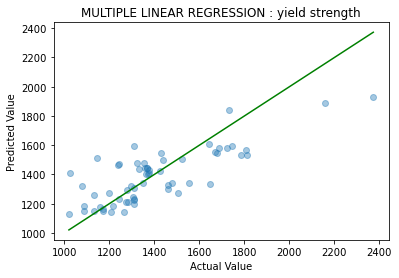

r2 score : 0.616057656921362
rmse : 159.42606974080635
mae : 104.47581097968032
test std : 257.29203047088794


In [86]:
target = "yield strength"

mlr = LinearRegression()
mlr.fit(x_train, y_train[target])

prediction = mlr.predict(x_test)

plt.scatter(y_test[target], prediction, alpha=0.4)
plt.plot([min(min(y_test[target]), min(prediction)), max(max(y_test[target]), max(prediction))]
         , [min(min(y_test[target]), min(prediction)), max(max(y_test[target]), max(prediction))]
         , color = "green")
plt.plot()
plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")
plt.title("MULTIPLE LINEAR REGRESSION : "+ target)
plt.show()

print("r2 score : " + str(r2_score(y_test[target], prediction)))
print("rmse : " + str(math.sqrt(mean_squared_error(y_test[target], prediction))))
print("mae : " + str(median_absolute_error(y_test[target], prediction)))
print("test std : " + str(np.std(y_test[target])))

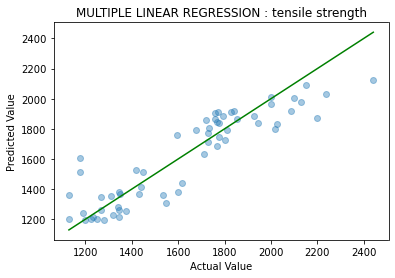

r2 score : 0.8134801579658587
rmse : 140.5157101692388
mae : 82.92454222816991
test std : 325.35865433066857


In [87]:
target = "tensile strength"

mlr = LinearRegression()
mlr.fit(x_train, y_train[target])

prediction = mlr.predict(x_test)

plt.scatter(y_test[target], prediction, alpha=0.4)
plt.plot([min(min(y_test[target]), min(prediction)), max(max(y_test[target]), max(prediction))]
         , [min(min(y_test[target]), min(prediction)), max(max(y_test[target]), max(prediction))]
         , color = "green")
plt.plot()
plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")
plt.title("MULTIPLE LINEAR REGRESSION : "+ target)
plt.show()

print("r2 score : " + str(r2_score(y_test[target], prediction)))
print("rmse : " + str(math.sqrt(mean_squared_error(y_test[target], prediction))))
print("mae : " + str(median_absolute_error(y_test[target], prediction)))
print("test std : " + str(np.std(y_test[target])))

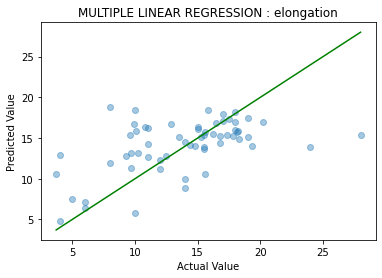

r2 score : 0.2555197784786648
rmse : 4.141739338510994
mae : 2.30208986317502
test std : 4.800165163332413


In [88]:
df_filtered = df[~pd.isna(df.elongation)]

x = df_filtered[['c','mn','si','cr','ni','mo','v','n','nb','co','w','al','ti']]
y = df_filtered[['yield strength','tensile strength','elongation']]

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, test_size = 0.2)

target = "elongation"

mlr = LinearRegression()
mlr.fit(x_train, y_train[target])

prediction = mlr.predict(x_test)

plt.scatter(y_test[target], prediction, alpha=0.4)
plt.plot([min(min(y_test[target]), min(prediction)), max(max(y_test[target]), max(prediction))]
         , [min(min(y_test[target]), min(prediction)), max(max(y_test[target]), max(prediction))]
         , color = "green")
plt.plot()
plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")
plt.title("MULTIPLE LINEAR REGRESSION : "+ target)
plt.show()

print("r2 score : " + str(r2_score(y_test[target], prediction)))
print("rmse : " + str(math.sqrt(mean_squared_error(y_test[target], prediction))))
print("mae : " + str(median_absolute_error(y_test[target], prediction)))
print("test std : " + str(np.std(y_test[target])))

## random forest regressor

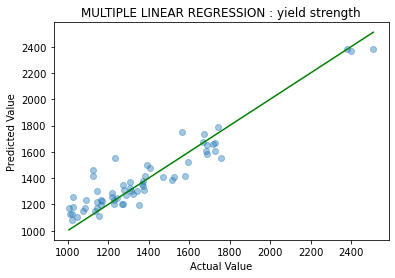

r2 score : 0.8763041289862921
rmse : 112.90638069987922
mae : 65.55800000000045
test std : 321.02650041430223


In [96]:
x = df[['c','mn','si','cr','ni','mo','v','n','nb','co','w','al','ti']]
y = df[['yield strength','tensile strength','elongation']]

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, test_size = 0.2)

target = "yield strength"

rf = RandomForestRegressor()
rf.fit(x_train, y_train[target])

prediction = rf.predict(x_test)

plt.scatter(y_test[target], prediction, alpha=0.4)
plt.plot([min(min(y_test[target]), min(prediction)), max(max(y_test[target]), max(prediction))]
         , [min(min(y_test[target]), min(prediction)), max(max(y_test[target]), max(prediction))]
         , color = "green")
plt.plot()
plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")
plt.title("MULTIPLE LINEAR REGRESSION : "+ target)
plt.show()

print("r2 score : " + str(r2_score(y_test[target], prediction)))
print("rmse : " + str(math.sqrt(mean_squared_error(y_test[target], prediction))))
print("mae : " + str(median_absolute_error(y_test[target], prediction)))
print("test std : " + str(np.std(y_test[target])))

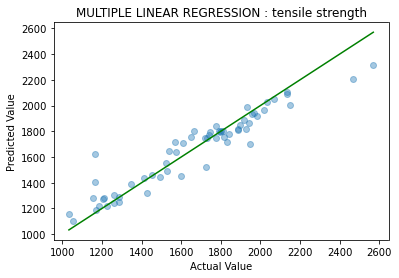

r2 score : 0.8928094362300353
rmse : 112.23423847033668
mae : 51.57300000000032
test std : 342.80495174693704


In [99]:
x = df[['c','mn','si','cr','ni','mo','v','n','nb','co','w','al','ti']]
y = df[['yield strength','tensile strength','elongation']]

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, test_size = 0.2)

target = "tensile strength"

rf = RandomForestRegressor()
rf.fit(x_train, y_train[target])

prediction = rf.predict(x_test)

plt.scatter(y_test[target], prediction, alpha=0.4)
plt.plot([min(min(y_test[target]), min(prediction)), max(max(y_test[target]), max(prediction))]
         , [min(min(y_test[target]), min(prediction)), max(max(y_test[target]), max(prediction))]
         , color = "green")
plt.plot()
plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")
plt.title("MULTIPLE LINEAR REGRESSION : "+ target)
plt.show()

print("r2 score : " + str(r2_score(y_test[target], prediction)))
print("rmse : " + str(math.sqrt(mean_squared_error(y_test[target], prediction))))
print("mae : " + str(median_absolute_error(y_test[target], prediction)))
print("test std : " + str(np.std(y_test[target])))

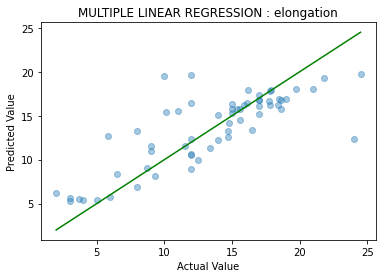

r2 score : 0.6412986100455185
rmse : 3.1433778870800126
mae : 1.698000000000011
test std : 5.248437911475702


In [98]:
df_filtered = df[~pd.isna(df.elongation)]

x = df_filtered[['c','mn','si','cr','ni','mo','v','n','nb','co','w','al','ti']]
y = df_filtered[['yield strength','tensile strength','elongation']]

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, test_size = 0.2)

target = "elongation"

rf = RandomForestRegressor()
rf.fit(x_train, y_train[target])

prediction = rf.predict(x_test)

plt.scatter(y_test[target], prediction, alpha=0.4)
plt.plot([min(min(y_test[target]), min(prediction)), max(max(y_test[target]), max(prediction))]
         , [min(min(y_test[target]), min(prediction)), max(max(y_test[target]), max(prediction))]
         , color = "green")
plt.plot()
plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")
plt.title("MULTIPLE LINEAR REGRESSION : "+ target)
plt.show()

print("r2 score : " + str(r2_score(y_test[target], prediction)))
print("rmse : " + str(math.sqrt(mean_squared_error(y_test[target], prediction))))
print("mae : " + str(median_absolute_error(y_test[target], prediction)))
print("test std : " + str(np.std(y_test[target])))

## DNN Regressor

In [101]:
from tensorflow import keras
from tensorflow.keras import layers

In [100]:
x = df[['c','mn','si','cr','ni','mo','v','n','nb','co','w','al','ti']]
y = df[['yield strength','tensile strength','elongation']]

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, test_size = 0.2)

In [117]:
x_train.shape[1]

13

In [137]:
def build_model():
    model = keras.Sequential([
        layers.Dense(16, activation = 'relu', input_shape=[x_train.shape[1]]),
        layers.Dense(16, activation = 'relu'),
        layers.Dense(1)
    ])
    
    optimizer = tf.keras.optimizers.RMSprop(0.001)
    
    model.compile(loss='mse',
                  optimizer = optimizer,
                  metrics = ['mae','mse'])
    return model

In [140]:
model = build_model()
model.summary()
model.predict(x_train[:10])

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 16)                224       
                                                                 
 dense_16 (Dense)            (None, 16)                272       
                                                                 
 dense_17 (Dense)            (None, 1)                 17        
                                                                 
Total params: 513
Trainable params: 513
Non-trainable params: 0
_________________________________________________________________


array([[ 0.29893786],
       [ 1.3960001 ],
       [-0.3397743 ],
       [-3.0761046 ],
       [ 1.6171212 ],
       [ 1.2273078 ],
       [-3.5936904 ],
       [-0.47256   ],
       [ 1.5864323 ],
       [ 0.28932765]], dtype=float32)

In [142]:
class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0: print('')
        print('.', end = '')
        
EPOCHS = 1000

history = model.fit(
    x_train, y_train,
    epochs=EPOCHS, validation_split = 0.2, verbose=0,
    callbacks=[PrintDot()]
)


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

In [123]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
995,580867.4375,683.358459,580867.4375,597626.3125,694.831848,597626.3125,995
996,580894.6875,683.434265,580894.6875,597563.1250,693.436707,597563.1250,996
997,580786.6875,681.312927,580786.6875,597772.3750,695.831238,597772.3750,997
998,580749.0625,683.077454,580749.0625,598147.5625,698.877563,598147.5625,998
999,580893.3125,686.293640,580893.3125,598318.0625,699.845642,598318.0625,999


In [136]:
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
995,580867.4375,683.358459,580867.4375,597626.3125,694.831848,597626.3125,995
996,580894.6875,683.434265,580894.6875,597563.1250,693.436707,597563.1250,996
997,580786.6875,681.312927,580786.6875,597772.3750,695.831238,597772.3750,997
998,580749.0625,683.077454,580749.0625,598147.5625,698.877563,598147.5625,998
999,580893.3125,686.293640,580893.3125,598318.0625,699.845642,598318.0625,999


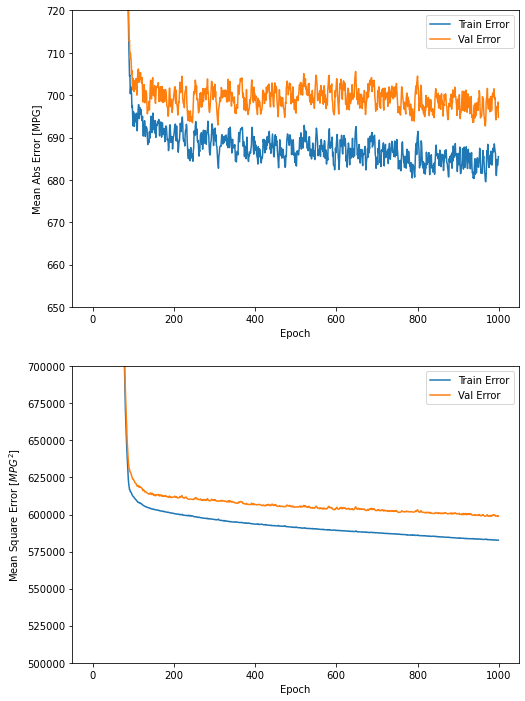

In [143]:
import matplotlib.pyplot as plt

def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure(figsize=(8,12))

  plt.subplot(2,1,1)
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [MPG]')
  plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
#   plt.ylim([0,5])
  plt.ylim([650,720])
  plt.legend()

  plt.subplot(2,1,2)
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$MPG^2$]')
  plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
#   plt.ylim([0,20])
  plt.ylim([0.5*1e6, 0.7*1e6])
  plt.legend()
  plt.show()

plot_history(history)


....................................................................................................
............................................................................

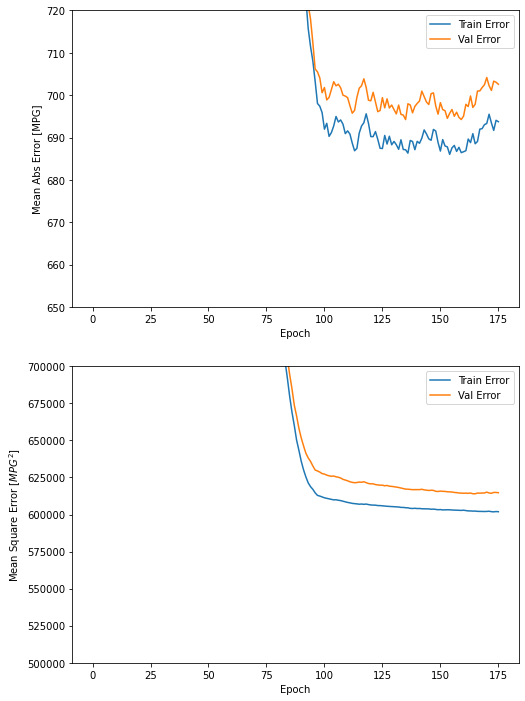

In [134]:
model = build_model()

# patience 매개변수는 성능 향상을 체크할 에포크 횟수입니다
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(x_train, y_train, epochs=EPOCHS,
                    validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])

plot_history(history)

In [135]:
loss, mae, mse = model.evaluate(x_test, y_test, verbose=2)

print("테스트 세트의 평균 절대 오차: {:5.2f} MPG".format(mae))

2/2 - 0s - loss: 536195.3750 - mae: 641.5524 - mse: 536195.3750 - 17ms/epoch - 8ms/step
테스트 세트의 평균 절대 오차: 641.55 MPG


In [141]:
model.predict(x_test)

array([[-0.32646596],
       [ 0.08241367],
       [ 0.35990182],
       [-2.2524114 ],
       [ 0.97061676],
       [ 0.06964827],
       [ 0.07058632],
       [ 0.09149248],
       [ 1.9217726 ],
       [-2.2817965 ],
       [-4.062988  ],
       [-0.3159135 ],
       [-2.7945778 ],
       [-0.18012986],
       [ 0.07973188],
       [-0.33241606],
       [ 1.5334793 ],
       [-2.9291906 ],
       [-0.2349028 ],
       [ 0.74557465],
       [ 0.5607006 ],
       [-4.563348  ],
       [ 1.732519  ],
       [-2.3476753 ],
       [-3.3329196 ],
       [ 0.07679817],
       [ 0.29684222],
       [-0.38257658],
       [-4.6005974 ],
       [ 1.3884171 ],
       [-3.375864  ],
       [ 0.5674596 ],
       [ 0.3345622 ],
       [-1.0816265 ],
       [ 1.2748162 ],
       [ 1.2299486 ],
       [-2.214096  ],
       [ 1.4625398 ],
       [ 0.84855485],
       [-2.910162  ],
       [-0.936494  ],
       [ 0.0388121 ],
       [ 1.6668745 ],
       [ 1.9279788 ],
       [ 1.7531155 ],
       [-1

Fe  0.620
C   0.000953
Mn  0.000521
Si  0.00102
Cr  0.000110
Ni  0.192
Mo  0.0176
V   0.000112
Nb  0.0000616
Co  0.146
Al  0.00318
Ti  0.0185

=0.620+0.000953+0.000521+0.00102+0.000110+0.192+0.0176+0.000112+0.0000616+0.146+0.00318+0.0185


Fe  0.623
C   0.00854
Mn  0.000104
Si  0.000203
Cr  0.147
Ni  0.0000971
Mo  0.0179
V   0.00515
N   0.00163
Nb  0.0000614
Co  0.188
W   0.00729
Al  0.000845

=0.623+0.00854+0.000104+0.000203+0.147+0.0000971+0.0179+0.00515+0.00163+0.0000614+0.188+0.00729+0.000845

1. 대상 공정 선정 필요
인장강도시험은 시편의 물성치(YieldStrength, TensileStrength 등)를 확인하기 위함
물성치에 영향을 주는 가공과 영향을 주지 않는 공정이 있을 것으로 보임
따라서, 분석 대상 변수는 물성치에 영향을 주는 가공처리에서 발생하는 실측or실적값임
  예, 열처리의 균열온도, 균열시간 실적 등 
(질문: 추가로 검토가 필요한 설비 데이터가 존재하는지? - 열처리 외, 물성치가 변화하는 설비)

2. 대상 컬럼 선정 필요
물성치에 영향을 주는 핵심인자는 조성비?성분비?율임
조성비가 
==> 무엇을 보고 결정하는지?

3. 
